In [41]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 21 22:39:05 2019

Increasing non linearity with fixed noise
@author: craba
"""
import numpy as np
import util as ut
import matplotlib.pyplot as plt
N = 4;
# this generates a positive definite P
P = np.random.rand(2,2);
P = P + P.T + 1*np.eye(2);
Q = np.random.rand(2,2)
np.set_printoptions(precision=4)
print (np.linalg.eig(P))

(array([3.0253, 0.157 ]), array([[ 0.7398, -0.6729],
       [ 0.6729,  0.7398]]))


In [81]:
W = np.eye(8)*3;
W[0:2, 2:4] = P;
W[0:2, 4:6] = P;
W[2:4, 6:8] = P;
W[4:6, 6:8] = -P;
W = -W.T + W+np.eye(8)*0.5;#
# print(np.linalg.eig(W))
alpha, beta, gamma = ut.returnStepSize(W);
w, v = np.linalg.eig(np.eye(8) - gamma*W)
print (gamma)
print (abs(w))
print (w)


0.013473782778453668
[0.9949 0.9949 0.9933 0.9933 0.9949 0.9949 0.9933 0.9933]
[0.9933+0.0576j 0.9933-0.0576j 0.9933+0.003j  0.9933-0.003j
 0.9933+0.0576j 0.9933-0.0576j 0.9933+0.003j  0.9933-0.003j ]


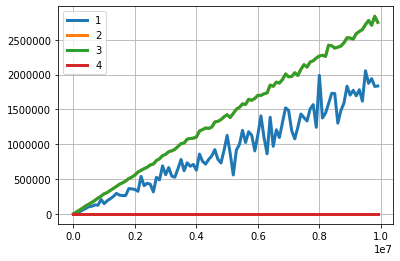

In [69]:
c = np.zeros(8);
x0 = np.random.rand(8)
# generate NE in the noiseless case
T = 1000;
x0 = np.random.rand(2*N);
linear = ut.runGradient(np.eye(2*N) - gamma*W, x0 = x0, T = T, offset=c);
# generate noise NE -- linear dynamics
# input noise is at player 1
noise = np.zeros((N*2,T));
samples = 100;
diff = np.zeros((N*2, samples));
epsilon = np.zeros(samples);
for sample in range(samples):
    epsilon[sample] = sample*100000.;
    noise[0:2,:] = epsilon[sample]*np.random.rand(2,T);
    
    linearNoisy = ut.runGradient(np.eye(2*N) - gamma*W,  
                                 x0 = x0, 
                                 noise = noise, 
                                 T = T, offset=c);
    diff[:, sample] = np.linalg.norm(linearNoisy - linear, axis = 1, ord = 2);
    
#    for player in range(N):
#        normDiff[player, sample] = np.sum( np.linalg.norm(
#            linear[player*2:(player+1)*2, :] - linearNoisy[player*2:(player+1)*2, :]
#            , ord = 2, axis = 0));
        
# plt.xlabel(r'$\epsilon$', fontsize = 18);
# plt.yscale('log');
# plt.ylabel(r'$\| y_i - x_i \|_2$', fontsize = 18);
ut.plot2D(diff/T, epsilon);

